## IMDb Datasets Analysis

* **Collaborators:** Mingrui Zhang
* **ID:** 20985422

In [1]:
# Java, Spark install
!apt-get update -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.3/spark-3.2.3-bin-hadoop2.7.tgz
!tar xf spark-3.2.3-bin-hadoop2.7.tgz
!pip install -q findspark

# Download IMDb Datasets and unzip it as tsv files
!wget -q https://datasets.imdbws.com/name.basics.tsv.gz
!wget -q https://datasets.imdbws.com/title.akas.tsv.gz
!wget -q https://datasets.imdbws.com/title.basics.tsv.gz
!wget -q https://datasets.imdbws.com/title.crew.tsv.gz
!wget -q https://datasets.imdbws.com/title.episode.tsv.gz
!wget -q https://datasets.imdbws.com/title.principals.tsv.gz
!wget -q https://datasets.imdbws.com/title.ratings.tsv.gz

# nameBasics
!gzip -d name.basics.tsv.gz
!mv name.basics.tsv nameBasics.tsv

# titleAkas
!gzip -d title.akas.tsv.gz
!mv title.akas.tsv titleAkas.tsv

# titleBasics
!gzip -d title.basics.tsv.gz
!mv title.basics.tsv titleBasics.tsv

# titleCrew
!gzip -d title.crew.tsv.gz
!mv title.crew.tsv titleCrew.tsv

# titleEpisode
!gzip -d title.episode.tsv.gz
!mv title.episode.tsv titleEpisode.tsv

# titlePrincipals
!gzip -d title.principals.tsv.gz
!mv title.principals.tsv titlePrincipals.tsv

# titleRatings
!gzip -d title.ratings.tsv.gz
!mv title.ratings.tsv titleRatings.tsv

In [2]:
# Download boxOffice csv
!wget -q https://raw.githubusercontent.com/MingruiZhangW/IMDbBigData/d47ceeecd1436f7d8936aef176514efe316bbf7b/boxoffice.csv

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop2.7"

import findspark
findspark.init()

from pyspark.sql import SparkSession
import random

spark = SparkSession.builder.appName("YourTest").master("local[2]").config('spark.ui.port', random.randrange(4000,5000)).getOrCreate()

In [4]:
# nameBasics
nameBasicRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("nameBasics.tsv").cache()
nameBasicRaw.createOrReplaceTempView("nameBasics")

# titleAkas
titleAkasRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleAkas.tsv").cache()
titleAkasRaw.createOrReplaceTempView("titleAkas")

# titleBasics
titleBasicsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleBasics.tsv").cache()
titleBasicsRaw.createOrReplaceTempView("titleBasics")

# titleCrew
titleCrewRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleCrew.tsv").cache()
titleCrewRaw.createOrReplaceTempView("titleCrew")

# titleEpisode
titleEpisodeRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleEpisode.tsv").cache()
titleEpisodeRaw.createOrReplaceTempView("titleEpisode")

# titlePrincipals
titlePrincipalsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titlePrincipals.tsv").cache()
titlePrincipalsRaw.createOrReplaceTempView("titlePrincipals")

# titleRatings
titleRatingsRaw = spark.read.option("header","true").option("sep", "\t") \
        .option("multiLine", "true") \
        .option("quote","\"") \
        .option("escape","\"") \
        .option("ignoreTrailingWhiteSpace", True) \
        .csv("titleRatings.tsv").cache()
titleRatingsRaw.createOrReplaceTempView("titleRatings")

In [5]:
# boxOffice
boxOfficeRaw = spark.read.option("header","true").csv("boxoffice.csv").cache()
boxOfficeRaw.createOrReplaceTempView("boxOffice")

> To see the data in table format, run the following code. 

In [6]:
print("nameBasicRaw")
nameBasicRaw.show()
print(nameBasicRaw.dtypes)
print("\n")

print("titleAkasRaw")
titleAkasRaw.show()
print(titleAkasRaw.dtypes)
print("\n")

print("titleBasicsRaw")
titleBasicsRaw.show()
print(titleBasicsRaw.dtypes)
print("\n")

print("titleCrewRaw")
titleCrewRaw.show()
print(titleCrewRaw.dtypes)
print("\n")

print("titleEpisodeRaw")
titleEpisodeRaw.show()
print(titleEpisodeRaw.dtypes)
print("\n")

print("titlePrincipalsRaw")
titlePrincipalsRaw.show()
print(titlePrincipalsRaw.dtypes)
print("\n")

print("titleRatingsRaw")
titleRatingsRaw.show()
print(titleRatingsRaw.dtypes)
print("\n")

print("boxOfficeRaw")
boxOfficeRaw.show()
print(boxOfficeRaw.dtypes)
print("\n")

nameBasicRaw
+---------+-------------------+---------+---------+--------------------+--------------------+
|   nconst|        primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+-------------------+---------+---------+--------------------+--------------------+
|nm0000001|       Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|      Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0038355,tt00373...|
|nm0000003|    Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00564...|
|nm0000004|       John Belushi|     1949|     1982|actor,soundtrack,...|tt0080455,tt00779...|
|nm0000005|     Ingmar Bergman|     1918|     2007|writer,director,a...|tt0060827,tt00839...|
|nm0000006|     Ingrid Bergman|     1915|     1982|actress,soundtrac...|tt0038109,tt00368...|
|nm0000007|    Humphrey Bogart|     1899|     1957|actor,soundtrack,...|tt0043265,tt00345...|
|nm0000008|      Marlon Brando|     1924|     2

## Movie Production Team Selection - Ratings 

- Input:
1. Genres
2. IsAdult
3. Maximum Age
4. Vote/Rate Ratio

> Possible Selection of Genres
- Action
- Adventure
- Animation
- Biography
- Comedy
- Crime	
- Documentary
- Drama
- Family
- Fantasy
- Film Noir
- History	
- Horror
- Music
- Musical
- Mystery
- Romance
- Sci-Fi	
- Short Film
- Sport
- Superhero
- Thriller
- War
- Western

> The larger the Vote/Rate Ratio is, the more popular the samples are. (The value is between 0 - 1) Note that the maximum amount of votes currently is around 2,670,818. This value should be considered carefully for better results.

- Output:
1. Possible Crews
2. Possible Actors

In [22]:
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import datetime

def movieProductionToolRatings(genres, isAdult, maxAge, voteRateRatio):
  # Make sure that we only deal with movie
  titleBasicsMovie = titleBasicsRaw.filter(titleBasicsRaw.titleType == "movie")

  # Process rateVoteRatio first
  titleRatingsWithVRR = titleRatingsRaw.withColumn("voteRateRatio", titleRatingsRaw.numVotes/titleRatingsRaw.averageRating)
  maxVRR = titleRatingsWithVRR.orderBy("voteRateRatio", ascending=False).head()[3]
  VRRfilter = maxVRR * voteRateRatio

  # Join titleBasics and titleRatingsWithVRR
  titleBasicsMovieWithRating = titleRatingsWithVRR.join(titleBasicsMovie, titleRatingsWithVRR.tconst == titleBasicsMovie.tconst, "inner")\
                           .drop(titleRatingsWithVRR.tconst)

  # Filter use VRRfilter
  titleRatingsWithVRRBestRatings = titleBasicsMovieWithRating.filter(titleBasicsMovieWithRating.voteRateRatio >= VRRfilter)

  # Now start to filter genres and isAdult
  filterGenres = titleRatingsWithVRRBestRatings.filter(titleRatingsWithVRRBestRatings.genres.contains(genres)).\
                          filter(titleRatingsWithVRRBestRatings.isAdult == ('1' if isAdult else '0'))
  filterGenres = filterGenres.drop("averageRating", "numVotes", "voteRateRatio", "titleType", "isAdult", "startYear", "endYear", "runtimeMinutes", "genres")
  
  # Get the principals crew and join nameBasicRaw
  principalsCrews = filterGenres.join(titlePrincipalsRaw, titlePrincipalsRaw.tconst == filterGenres.tconst, "inner")\
                  .drop(titlePrincipalsRaw.tconst).drop(titlePrincipalsRaw.ordering).drop(titlePrincipalsRaw.characters)
  principalsCrews = principalsCrews.join(nameBasicRaw, titlePrincipalsRaw.nconst == nameBasicRaw.nconst, "inner")\
                    .drop(principalsCrews.tconst).drop(nameBasicRaw.nconst)

  # Filter out the people that are passed away or older than maxAge
  # Cache the result for future use
  thisYear = datetime.datetime.now().year
  birthYearToFilter = thisYear - maxAge
  principalsCrewsCache = principalsCrews.filter(principalsCrews.deathYear == "\\N").filter(principalsCrews.birthYear >= birthYearToFilter).cache()
  candidates = principalsCrewsCache

  # Now we use knownForTitles to calculate the overall average ratings
  # This is achieved by using split to firstly convert the string into array
  # and explode it into multiple rows and each row will have a title within
  # the knownForTitles
  candidates = candidates.withColumn("titlesArray", split(candidates.knownForTitles, ","))
  candidates = candidates.withColumn("titleSep", explode(candidates.titlesArray))
  candidates = candidates.drop(candidates.knownForTitles).drop(candidates.titlesArray)

  # Join titleRatingsRaw to get the ratings for each title
  candidates = candidates.join(titleRatingsRaw, candidates.titleSep == titleRatingsRaw.tconst, "inner")\
               .drop(candidates.titleSep).drop(titleRatingsRaw.numVotes)
  
  # Use groupBy and avg to find the average ratings
  # Inorder to use avg, the data type needs to be float, use cast
  candidates = candidates.withColumn("averageRating", candidates["averageRating"].cast("float"))
  candidatesAvgRatings = candidates.groupBy("primaryName").avg("averageRating")
  candidatesAvgRatings = candidatesAvgRatings.withColumnRenamed("avg(averageRating)", "averageRating")

  # Now join the principalsCrewsCache to get the pre-final table
  principalsCrewsPreFinal = principalsCrewsCache.join(candidatesAvgRatings, principalsCrewsCache.primaryName == candidatesAvgRatings.primaryName, "inner")\
                          .drop(principalsCrewsCache.primaryName)

  # For all the principals crews collected, we find all job categories and generate its data frame
  listCategory = [list(x.asDict().values())[0] for x in principalsCrewsPreFinal.select("category").distinct().collect()]
  resultArray = [principalsCrewsPreFinal.where(principalsCrewsPreFinal.category == x) for x in listCategory]
  
  # We will take the first 5 as the result crew for each job category by ranking the averageRating
  counter = 0
  for result in resultArray:
    print("Possible " + listCategory[counter] + "\n")

    result = result.orderBy("averageRating", ascending=False).limit(5)\
             .drop("primaryTitle", "originalTitle", "nconst", "job", "birthYear", "deathYear", "primaryProfession", "knownForTitles").distinct()
    result.show()
    
    # Draw the diagram
    pdDF = result.toPandas()
    pdDF['averageRating'] = pdDF['averageRating'].astype(float)
    pdDF.plot.barh(x='primaryName', y='averageRating')

    # # Add labels to the x and y axes
    plt.xlabel("Average Rating")
    plt.ylabel(listCategory[counter])

    counter = counter + 1
    # Show the plot
    plt.show()

###################################################################################################################
#  the user interface
###################################################################################################################

# while True:
#     q = input("Input 1 or 2 space-separated tokens (return to quit): ")
#     if len(q) == 0:
#         break
#     q_tokens = simple_tokenize(q)
#     if len(q_tokens) == 1:
#         threshold = 0
#         while threshold <= 0:
#             try:
#                 threshold = int(input("Input a positive integer frequency threshold: "))
#             except ValueError:
#                 print("Threshold must be a positive integer!")
#                 continue
#         result = oneTokenQueries(q_tokens[0], threshold)

#         # Output result
#         print("  n({0}) = {1}".format(q_tokens[0], result[0]))

#         if len(result) > 1 :
#           print("  high PMI tokens with respect to {0} (threshold: {1}):".format(q_tokens[0],threshold))
#         else:
#           print("  No occurrence")
#         for i in range(1, len(result)):
#           print("    n({0},{1}) = {2},  PMI({0},{1}) = {3}".format(q_tokens[0], result[i][1], result[i][0], result[i][2]))
#     elif len(q_tokens) == 2:
#         # Put code here to answer a Two-Token Query with tokens q_tokens[0] and q_tokens[1]
#         # As was the case for the One-Token query, the print statements below show the desired output format
#         # Replace them with your own output code
#         result = twoTokenQueries(q_tokens[0], q_tokens[1])

#         if not len(result):
#           print("  No occurrence")
#         else:
#           print("  n({0},{1}) = {2}".format(q_tokens[0], q_tokens[1], result[0]))
#           print("  PMI({0},{1}) = {2}".format(q_tokens[0], q_tokens[1], result[1]))
#     else:
#         print("Input must consist of 1 or 2 space-separated tokens!")

Possible actress

+--------+---------------+-----------------+
|category|    primaryName|    averageRating|
+--------+---------------+-----------------+
| actress|Natalie Portman|7.974999904632568|
| actress|Keira Knightley|7.925000190734863|
+--------+---------------+-----------------+



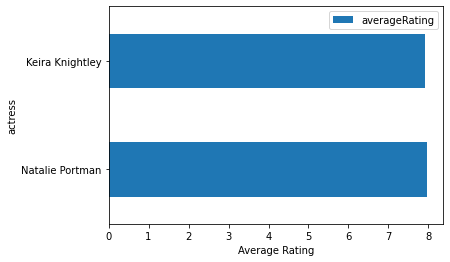

Possible producer

+--------+---------------+-----------------+
|category|    primaryName|    averageRating|
+--------+---------------+-----------------+
|producer|Lawrence Bender|8.424999952316284|
|producer|    Emma Thomas|8.275000095367432|
|producer|   Eric Monette|8.199999809265137|
+--------+---------------+-----------------+



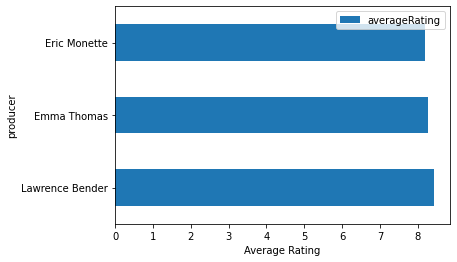

Possible writer

+--------+--------------+-----------------+
|category|   primaryName|    averageRating|
+--------+--------------+-----------------+
|  writer|Jonathan Nolan|8.650000095367432|
|  writer|    Fran Walsh|8.450000047683716|
+--------+--------------+-----------------+



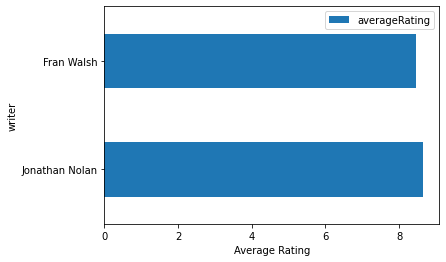

Possible composer

+--------+-----------+------------------+
|category|primaryName|     averageRating|
+--------+-----------+------------------+
|composer|Hans Zimmer| 8.225000023841858|
|composer| Éric Serra| 7.699999928474426|
|composer|  Junkie XL|7.6250001192092896|
|composer|  Don Davis|7.1249998807907104|
+--------+-----------+------------------+



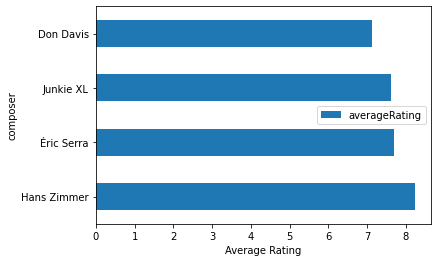

Possible director

+--------+-----------------+-----------------+
|category|      primaryName|    averageRating|
+--------+-----------------+-----------------+
|director|Christopher Nolan|8.300000190734863|
|director|    James Cameron|8.175000071525574|
+--------+-----------------+-----------------+



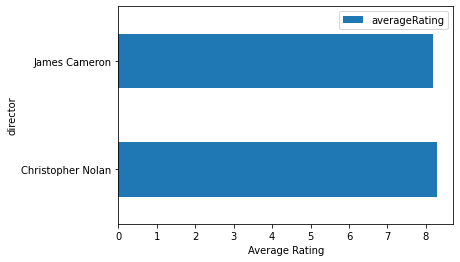

Possible actor

+--------+------------+-----------------+
|category| primaryName|    averageRating|
+--------+------------+-----------------+
|   actor| Elijah Wood|8.725000143051147|
|   actor|Hugo Weaving|8.700000047683716|
+--------+------------+-----------------+



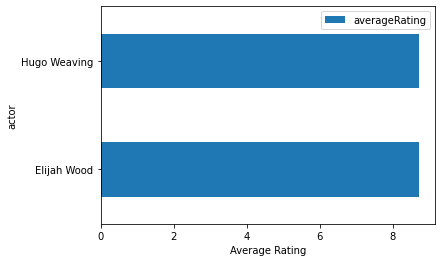

Possible editor

+--------+--------------+------------------+
|category|   primaryName|     averageRating|
+--------+--------------+------------------+
|  editor|     Lee Smith| 8.450000047683716|
|  editor|     Dody Dorn|7.6499998569488525|
|  editor|Zach Staenberg| 7.299999833106995|
+--------+--------------+------------------+



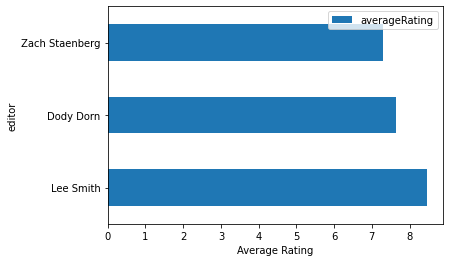

Possible cinematographer

+---------------+-----------------+-----------------+
|       category|      primaryName|    averageRating|
+---------------+-----------------+-----------------+
|cinematographer|    Wally Pfister|            8.625|
|cinematographer|Robert Richardson|7.899999976158142|
|cinematographer|        Bill Pope|7.774999976158142|
|cinematographer| Thierry Arbogast|7.575000047683716|
|cinematographer|  Seamus McGarvey|7.350000023841858|
+---------------+-----------------+-----------------+



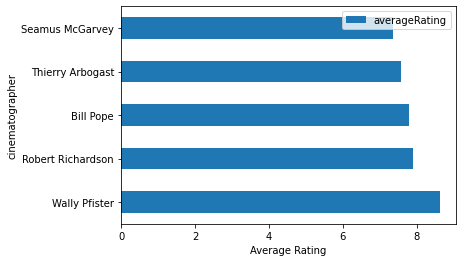

Possible production_designer

+-------------------+----------------+-----------------+
|           category|     primaryName|    averageRating|
+-------------------+----------------+-----------------+
|production_designer|Guy Hendrix Dyas|7.399999976158142|
+-------------------+----------------+-----------------+



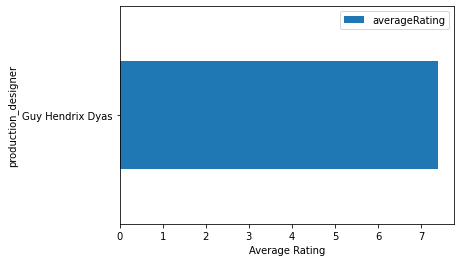

In [23]:
movieProductionToolRatings("Action", False, 70, 0.4)